##Model Interpretation for Chi-Square Tests:

We are interested to test the assoication between the variables *life expectancy* and *alcohol consumption* in the Gapminder dataset. Both these variables are numeric, so we first converted both of them to 2-level categorical variables (by splitting around the median value). When examining the association between life expectancy (categorical response) and alcohol consumption (categorical explanatory), a chi-square test of independence revealed that the countries with low alcohol consumption rates ((0-6] litres) were more likely to have higher life expectancies (71% of them with (0-70] years) compared to those with high alcohol consumption rates (63% of them with (70-100] years), $\chi^2=18.61177373551309$, 1 df, p-value=1.6022793011516588e-05.

The df or degree of freedom we record is the number of levels of the explanatory variable -1. Here the df is 1 since the alcohol consumption has 2 levels (df 2-1=1).

In [59]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [60]:
import pandas
import scipy.stats
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

data = pandas.read_csv('C:\\courses\\Coursera\\Current\\Data Analysis Tools\\Week2\\gapminder.csv')
data.drop('country', 1)

df1 = pandas.DataFrame(data, columns=['lifeexpectancy', 'alcconsumption'])
#df1 = data.copy()
#df1['alcconsumption'] = pandas.to_numeric(df1['alcconsumption'], errors='coerce')
df1['alcconsumption'] = data['alcconsumption'].convert_objects(convert_numeric=True)
#df1['urbanrate'] = pandas.to_numeric(df1['urbanrate'], errors='coerce')
#df1['urbanrate'] = data['urbanrate'].convert_objects(convert_numeric=True)
#df1['lifeexpectancy'] = pandas.to_numeric(df1['lifeexpectancy'], errors='coerce')
df1['lifeexpectancy'] = data['lifeexpectancy'].convert_objects(convert_numeric=True)
df1 = df1.dropna()
df1.describe()

,lifeexpectancy,alcconsumption
count,176.000000,176.000000
mean,69.143682,6.646250
std,9.828267,4.977415
min,47.794000,0.030000
25%,62.646000,2.495000
50%,72.558500,5.865000
75%,75.985000,9.810000
max,83.394000,23.010000


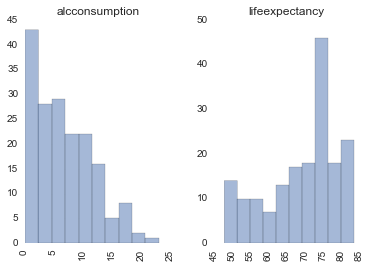

In [61]:
plt.figure()
df1.hist(alpha=0.5, bins=10, xrot=90)
plt.show()

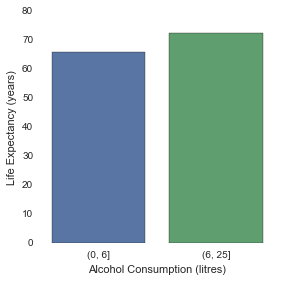

In [62]:
df2 = df1.copy()
df2['alcconsumption'] = pandas.cut(df2.alcconsumption, bins=[0,6,25])
seaborn.factorplot(x="alcconsumption", y="lifeexpectancy", data=df2, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption (litres)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [63]:
df2['lifeexpectancy'] = pandas.cut(df2.lifeexpectancy, bins=[0,70,100])

In [64]:
# contingency table of observed counts
ct1=pandas.crosstab(df2['alcconsumption'], df2['lifeexpectancy'])
print (ct1)

lifeexpectancy  (0, 70]  (70, 100]
alcconsumption                    
(0, 6]               53         37
(6, 25]              22         64


In [65]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

lifeexpectancy   (0, 70]  (70, 100]
alcconsumption                     
(0, 6]          0.706667   0.366337
(6, 25]         0.293333   0.633663


In [66]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(18.61177373551309, 1.6022793011516588e-05, 1, array([[ 38.35227273,  51.64772727],
       [ 36.64772727,  49.35227273]]))


###Model Interpretation for post hoc Chi-Square Test results:

Now in order to understand the association better, let's split the numeric explanatory variable alcohol consumption into 4 categories (around the quartiles) and redo the chi-square test. The Chi Square test of independence again revealed that the alcohol consumption (collapsed into 4 ordered categories) and the life expectancy (binary categorical variable) were significantly associated, $\chi-square=21.534561903395307$, 3 df, p-value=8.1518704166760222e-05.

In [67]:
df1['alcconsumption'] = pandas.cut(df1.alcconsumption, bins=[0,2.5,6,10,25])

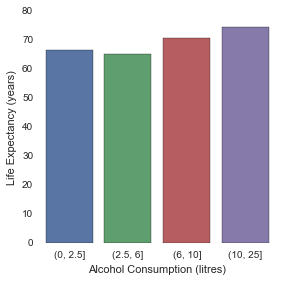

In [68]:
seaborn.factorplot(x="alcconsumption", y="lifeexpectancy", data=df1, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption (litres)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [69]:
df1['lifeexpectancy'] = pandas.cut(df1.lifeexpectancy, bins=[0,70,100])
#df1.head()

In [70]:
# contingency table of observed counts
ct1=pandas.crosstab(df1['alcconsumption'], df1['lifeexpectancy'])
print (ct1)

lifeexpectancy  (0, 70]  (70, 100]
alcconsumption                    
(0, 2.5]             25         19
(10, 25]              8         34
(2.5, 6]             28         18
(6, 10]              14         30


In [71]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

lifeexpectancy   (0, 70]  (70, 100]
alcconsumption                     
(0, 2.5]        0.333333   0.188119
(10, 25]        0.106667   0.336634
(2.5, 6]        0.373333   0.178218
(6, 10]         0.186667   0.297030


In [72]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(21.534561903395307, 8.1518704166760222e-05, 3, array([[ 18.75      ,  25.25      ],
       [ 17.89772727,  24.10227273],
       [ 19.60227273,  26.39772727],
       [ 18.75      ,  25.25      ]]))


As we can see from the above result, the p-value < 0.05 and we can (reject the *null hypothesis* of independence and) conclude that the categorical variables *life expectancy* and *alcohol consumption* are not independent. 

Now, we need to do *post hoc comparisons* to test the association between different levels of alcohol consumption. There are 4 different levels, so we need to do $4 \choose 2$ = 6 paired chi-square tests for each pair of levels of alcohol consumption with life expectancy, with *Bonferroni's correction* on p-value (with p-value = 0.05/6=0.08333 at 5% level of significance). 

Post hoc comparisons of life expectancy by pairs of alcohol consumption categories revealed that higher life expectancy was seen among the countries with higher rates of alcohol consumption, e.g., the countries with (high) alcohol consumption in between (10,25] litres have (statistically) significantly higher life expectancy (with p-value$\approx 0.00073 < 0.08333$) than the countries with (low) alcohol consumption rate in between (0,2.5]!

In [73]:
recode2 = {'(0, 2.5]': '(0, 2.5]', '(10, 25]': '(10, 25]'}
df1['alcconsumption2.5v25']= df1['alcconsumption'].map(recode2)
# contingency table of observed counts
ct2=pandas.crosstab(df1['alcconsumption2.5v25'], df1['lifeexpectancy'])
print (ct2)

lifeexpectancy        (0, 70]  (70, 100]
alcconsumption2.5v25                    
(0, 2.5]                   25         19
(10, 25]                    8         34


In [74]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

lifeexpectancy         (0, 70]  (70, 100]
alcconsumption2.5v25                     
(0, 2.5]              0.757576   0.358491
(10, 25]              0.242424   0.641509


In [75]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(11.415351134476344, 0.0007283972892965175, 1, array([[ 16.88372093,  27.11627907],
       [ 16.11627907,  25.88372093]]))


In comparison, post hoc comparisons of life expectancy shows that the life expectancy is statistically similar among those countries with alcohol consumptions (0,2.5] and (2.5,10] (with p-value greater than 0.08333, as shown in the following results).

In [76]:
recode2 = {'(0, 2.5]': '(0, 2.5]', '(2.5, 6]': '(2.5, 6]'}
df1['alcconsumption2.5v6']= df1['alcconsumption'].map(recode2)
# contingency table of observed counts
ct2=pandas.crosstab(df1['alcconsumption2.5v6'], df1['lifeexpectancy'])
print (ct2)

lifeexpectancy       (0, 70]  (70, 100]
alcconsumption2.5v6                    
(0, 2.5]                  25         19
(2.5, 6]                  28         18


In [77]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

lifeexpectancy        (0, 70]  (70, 100]
alcconsumption2.5v6                     
(0, 2.5]             0.471698   0.513514
(2.5, 6]             0.528302   0.486486


In [78]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(0.031042583339548117, 0.86014541859668669, 1, array([[ 25.91111111,  18.08888889],
       [ 27.08888889,  18.91111111]]))
